<a href="https://colab.research.google.com/github/UtsavRao/PRODIGY_DS_02/blob/main/TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Intern At Prodigy InfoTech

Author: Utsav Yadav

Task 2: Perform data cleaning and exploratory data analysis (EDA) on McDonald's menu DataSet

Preliminary data transformation and cleaning.

In [20]:
import numpy as np                ## linear algebra
import pandas as pd               ## data processing, dataaset file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt   ## data visualization & graphical plotting
import seaborn as sns             ## to visualize random distributions
%matplotlib inline

from IPython.display import HTML  ## to embed YouTube video (you can find the vid at the end)

import warnings                 # to deal with warning messages
warnings.filterwarnings('ignore')

Loading And Data Preparing

In [22]:
## Load the data file into the environment
df=pd.read_csv ('burger-king-menu.csv')

## have a glance at the dataset contents, and the  variables
df.head()

,Item,Category,Calories,Fat Calories,Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Sugars (g),Protein (g),Weight Watchers
0,Whopper® Sandwich,Burgers,660.0,360.0,40.0,12.0,1.5,90.0,980.0,49.0,2.0,11.0,28.0,655.0
1,Whopper® Sandwich with Cheese,Burgers,740.0,420.0,46.0,16.0,2.0,115.0,1340.0,50.0,2.0,11.0,32.0,735.0
2,Bacon & Cheese Whopper® Sandwich,Burgers,790.0,460.0,51.0,17.0,2.0,125.0,1560.0,50.0,2.0,11.0,35.0,783.0
3,Double Whopper® Sandwich,Burgers,900.0,520.0,58.0,20.0,3.0,175.0,1050.0,49.0,2.0,11.0,48.0,883.0
4,Double Whopper® Sandwich with Cheese,Burgers,980.0,580.0,64.0,24.0,3.0,195.0,1410.0,50.0,2.0,11.0,52.0,963.0


In [23]:
## Gauge the dataframe to check feature data types, value count, memory usage etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item               77 non-null     object 
 1   Category           77 non-null     object 
 2   Calories           77 non-null     float64
 3   Fat Calories       77 non-null     float64
 4   Fat (g)            77 non-null     float64
 5   Saturated Fat (g)  77 non-null     float64
 6   Trans Fat (g)      77 non-null     float64
 7   Cholesterol (mg)   77 non-null     float64
 8   Sodium (mg)        77 non-null     float64
 9   Total Carb (g)     77 non-null     float64
 10  Dietary Fiber (g)  77 non-null     float64
 11  Sugars (g)         77 non-null     float64
 12  Protein (g)        77 non-null     float64
 13  Weight Watchers    77 non-null     float64
dtypes: float64(12), object(2)
memory usage: 8.5+ KB


In [24]:
## Checking for  duplicate records
df.duplicated().sum()


2

In [25]:
## Removing the duplicates, if any
df.drop_duplicates(inplace=True)
df.shape

(75, 14)

**Exploratory Data Analysis (EDA)**

Correlation Heatmap
A heatmap allows in understanding the correlation between various variables, through figures and a color coding

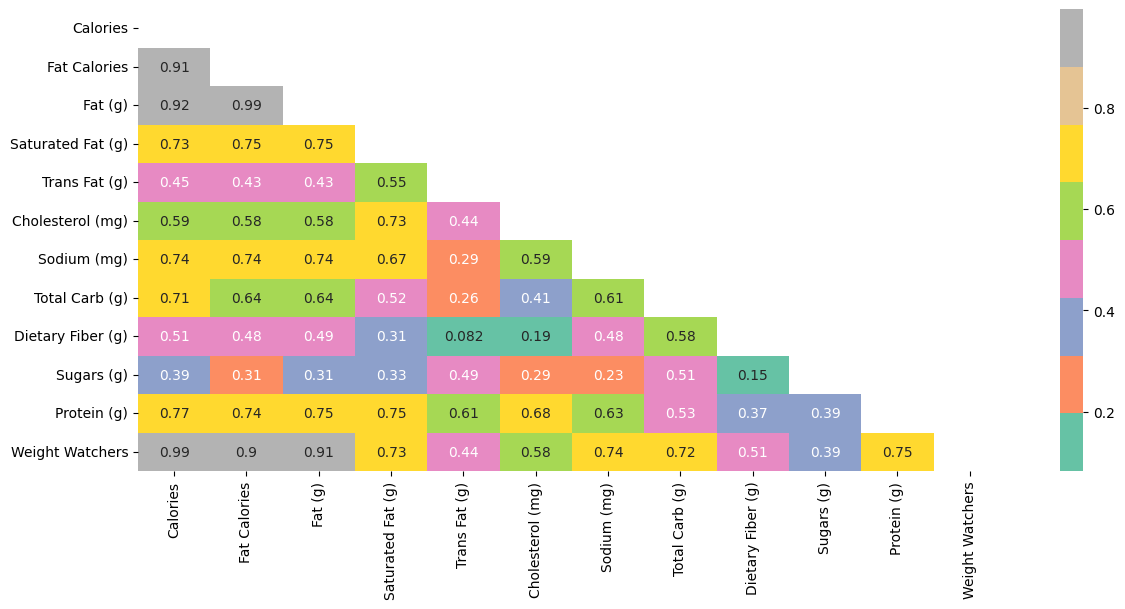

In [26]:
## Have a look at correlation between different variables

plt.figure(figsize=(14,6))
corr = df.corr(method='kendall')
my_m=np.triu(corr)
sns.heatmap(corr, mask=my_m, annot=True, cmap="Set2")
plt.show()

In [27]:
## Checking the Unique variables in the Category column
df['Category'].unique()

array(['Burgers', 'Chicken', 'Breakfast'], dtype=object)

In [28]:
## Detemining the number of items in each unique category
df_items = pd.DataFrame(df['Category'].value_counts())     ## Create a DataFrame to see number of Items by Category
df_items['ItemCategory'] = df_items.index                  ## assign "Category" as index
df_items.columns = ['No. of Items', 'Item Category']
df_items = df_items.reset_index().drop('index', axis=1)
df_items.head()

,No. of Items,Item Category
0,33,Breakfast
1,24,Burgers
2,18,Chicken


[Text(0.5, 1.0, 'Segments in Category Variable (in %)')]

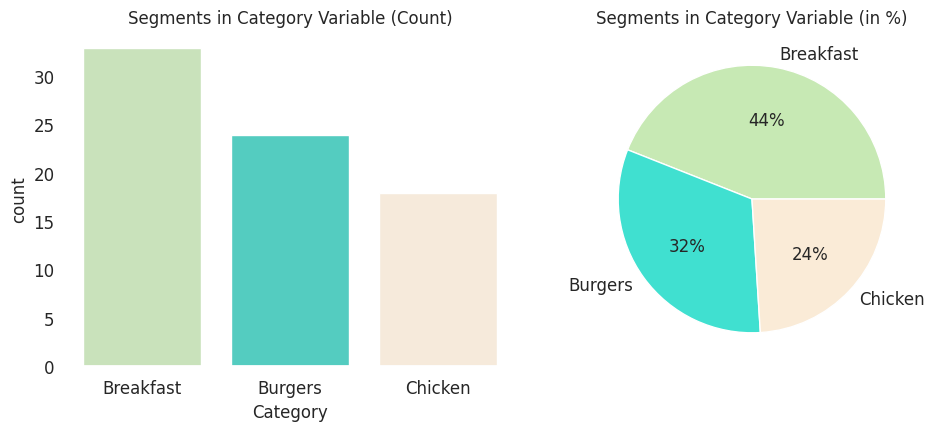

In [29]:
## Let's have a broader look at the Category variable & components in it
sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':12,'ytick.labelsize':12, 'figure.autolayout':True})
plt.figure(figsize=(10,8))
my_pal = ('#c7e9b4', '#40E0D0', '#FAEBD7')

## Countplot to show number of Items in each category segment
plt.subplot(2,2,1)
sns.countplot(x="Category", palette=my_pal, data=df, order=df['Category'].value_counts().index).set(title='Segments in Category Variable (Count)')

## Pie diagram to show % share of each category segment
plt.subplot(2,2,2)
colors = ('#c7e9b4', '#40E0D0', '#FAEBD7')
df['Category'].value_counts().plot(kind='pie', colors=my_pal,legend=None, ylabel='', autopct='%1.0f%%').set(title='Segments in Category Variable (in %)')

In [30]:
## Grouping the variable into low, medium & high Categories

## Calories
def filter(x):
    if x <= 400:
        return 'low'
    if (x > 400 and x <= 800):
        return 'medium'
    if x > 800:
        return 'high'
df['Calories'] = df['Calories'].apply(filter)

## Fats
def filter(x):
    if x <= 30:
        return 'low'
    if (x > 30 and x <= 60):
        return 'medium'
    if x > 60:
        return 'high'
df['Fat (g)'] = df['Fat (g)'].apply(filter)

## Carbohydrates
def filter(x):
    if x <= 30:
        return 'low'
    if (x > 30 and x <= 60):
        return 'medium'
    if x > 60:
        return 'high'
df['Total Carb (g)'] = df['Total Carb (g)'].apply(filter)

## Proteins
def filter(x):
    if x <= 25:
        return 'low'
    if (x > 25 and x <= 50):
        return 'medium'
    if x > 50:
        return 'high'
df['Protein (g)'] = df['Protein (g)'].apply(filter)

## Cholesterol
def filter(x):
    if x <= 125:
        return 'low'
    if (x > 125 and x <= 250):
        return 'medium'
    if x > 250:
        return 'high'
df['Cholesterol (mg)'] = df['Cholesterol (mg)'].apply(filter)

[Text(0.5, 1.0, 'Pie Chart - Protein (g): Low, Medium, High (%)')]

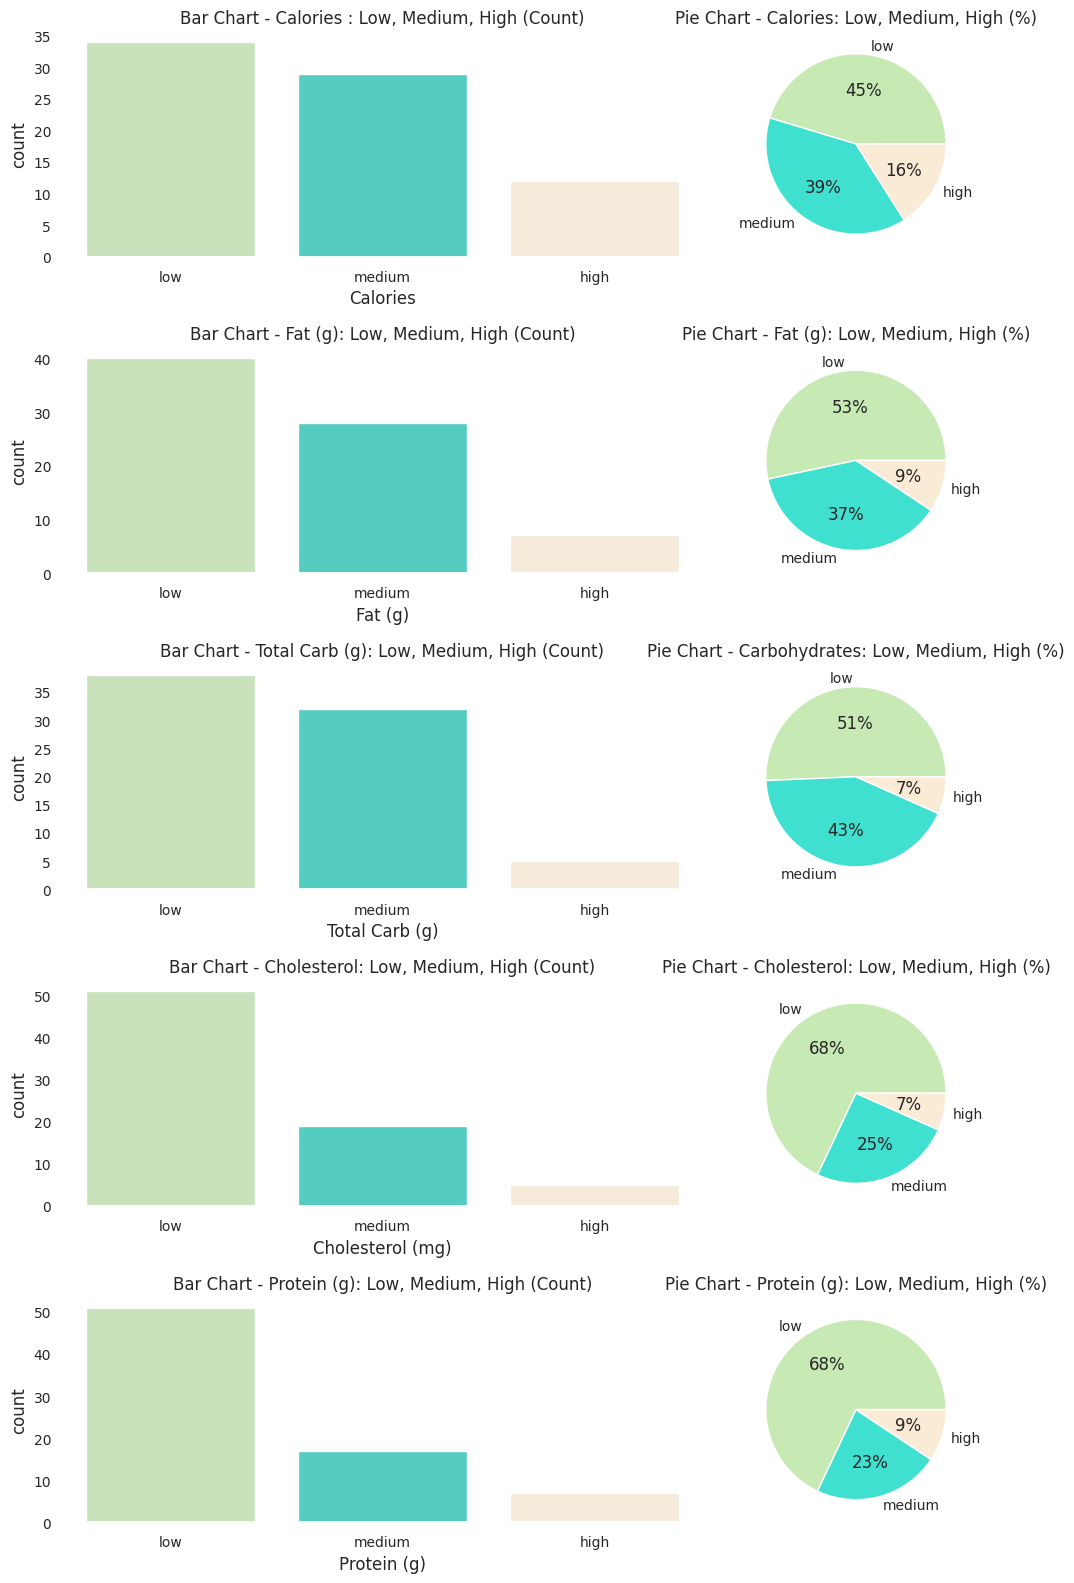

In [31]:
## Visualising the modified variables

sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':10,'ytick.labelsize':10, 'figure.autolayout':True})
plt.figure(figsize=(12,16))
my_pal=('#c7e9b4', '#40E0D0', '#FAEBD7')
order=('low', 'medium', 'high')

## Calories:
plt.subplot(5,2,1)
sns.countplot(x="Calories", palette=my_pal, data=df, order=order).set(title='Bar Chart - Calories : Low, Medium, High (Count)')

plt.subplot(5,2,2)
df['Calories'].value_counts().plot(kind='pie', colors=my_pal, legend=None, ylabel='', autopct='%1.0f%%').set(title='Pie Chart - Calories: Low, Medium, High (%)')

## Fat (g):
plt.subplot(5,2,3)
sns.countplot(x="Fat (g)", palette=my_pal, data=df, order=order).set(title='Bar Chart - Fat (g): Low, Medium, High (Count)')

plt.subplot(5,2,4)
df['Fat (g)'].value_counts().plot(kind='pie', colors=my_pal, legend=None, ylabel='', autopct='%1.0f%%').set(title='Pie Chart - Fat (g): Low, Medium, High (%)')

## Carbohydrates:
plt.subplot(5,2,5)
sns.countplot(x="Total Carb (g)", palette=my_pal, data=df, order=order).set(title='Bar Chart - Total Carb (g): Low, Medium, High (Count)')

plt.subplot(5,2,6)
df['Total Carb (g)'].value_counts().plot(kind='pie', colors=my_pal, legend=None, ylabel='', autopct='%1.0f%%').set(title='Pie Chart - Carbohydrates: Low, Medium, High (%)')

## Cholesterol:
plt.subplot(5,2,7)
sns.countplot(x="Cholesterol (mg)", palette=my_pal, data=df, order=order).set(title='Bar Chart - Cholesterol: Low, Medium, High (Count)')

plt.subplot(5,2,8)
df['Cholesterol (mg)'].value_counts().plot(kind='pie', colors=my_pal, legend=None, ylabel='', autopct='%1.0f%%').set(title='Pie Chart - Cholesterol: Low, Medium, High (%)')

## Protein:
plt.subplot(5,2,9)
sns.countplot(x="Protein (g)", palette=my_pal, data=df, order=order).set(title='Bar Chart - Protein (g): Low, Medium, High (Count)')

plt.subplot(5,2,10)
df['Protein (g)'].value_counts().plot(kind='pie', colors=my_pal, legend=None, ylabel='', autopct='%1.0f%%').set(title='Pie Chart - Protein (g): Low, Medium, High (%)')
